# Prediction over Iris Dataset with XGB classifer :

In this project we are going perform a simple prediction using very popular boosting model XGBoostClassifier.

In [1]:
 data_path = 'iris.csv'

In [2]:
# Important Libraries 

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
iris_data = pd.read_csv(data_path)

# Visualize the head of the dataframe

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print('shape of the data :',iris_data.shape)

shape of the data : (150, 5)


In [5]:
# Overview of the data 

iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


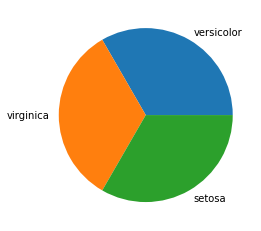

In [6]:
# Visualizing the target density 

counts = iris_data['species'].value_counts()

plt.pie(counts.values,labels=counts.index)
plt.show()

In [7]:
# Performimg Min-Max scaling :

def minmaxscaling(data):
    
    for feature in data.columns:
        if data[feature].dtype != 'object':
            min_value = min(data[feature])
            max_value = max(data[feature])
            data[feature] = (data[feature]-min_value) / (max_value-min_value)
    
    return data

In [8]:
scaled_df = minmaxscaling(iris_data)

scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


In [9]:
# Creating train and test data :

# In this part we are going to split the train and test data as such 
# that both the train and test have equality in target feature.
train = pd.DataFrame(columns=scaled_df.columns)
test = pd.DataFrame(columns=scaled_df.columns)

for sp_type in scaled_df['species'].unique():
    
    temp_df = scaled_df[scaled_df['species'] == sp_type ]
    
    temp_df = temp_df.sample(frac = 1)  # shuffling the data
    
    length = len(temp_df)//5  # test_size defined
    
    train = pd.concat([train,temp_df[length:]] , axis = 0)
    
    test = pd.concat([test,temp_df[:length]] , axis = 0)
    
print(train.shape,test.shape)

(120, 5) (30, 5)


In [10]:
# splitting featureset and target value

X_train = train.drop('species',1)
y_train=train['species']

X_test = test.drop('species',1)
y_test = test['species']

In [11]:
y_train.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
# Numerating the targets :
#-------------------------
# sentosa : 0

# versicolor : 1

# virginica : 2

labels = ['setosa', 'versicolor', 'virginica']

for i in range(3):
    y_train.replace(labels[i] , i , inplace = True)
    y_test.replace(labels[i] , i , inplace = True )

In [13]:
print('X_train --------> ',X_train.shape)

print('y_train --------> ',y_train.shape)

print('X_train --------> ',X_test.shape)

print('X_train --------> ',y_test.shape)

X_train -------->  (120, 4)
y_train -------->  (120,)
X_train -------->  (30, 4)
X_train -------->  (30,)


In [14]:
# Importing training model

from sklearn.ensemble import RandomForestClassifier as rfc

In [15]:
model = rfc( verbose = 1 , random_state = 42 )

print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)


In [16]:
# Model training on train data

model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [17]:
print('Train Data Accuracy :',model.score(X_train,y_train)*100,'%')

Train Data Accuracy : 100.0 %


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [18]:
print('Test Data Accuracy :',model.score(X_test,y_test)*100,'%')

Test Data Accuracy : 93.33333333333333 %


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [19]:
# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [20]:
def plot_conf_matrix( featureset , target , model ):
    prediction = model.predict( featureset ) 
    mat = confusion_matrix( target , prediction )
    plot_confusion_matrix( mat , figsize=(5,5) , colorbar = True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


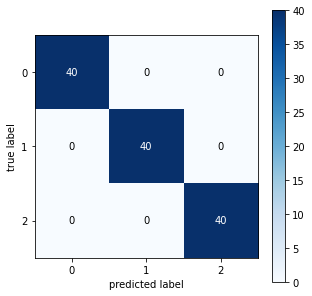

In [21]:
plot_conf_matrix(X_train,y_train,model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


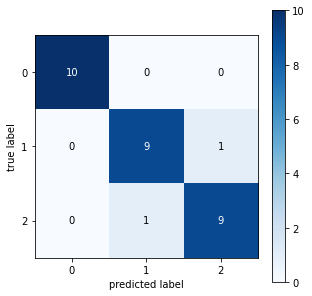

In [22]:
plot_conf_matrix(X_test,y_test,model)

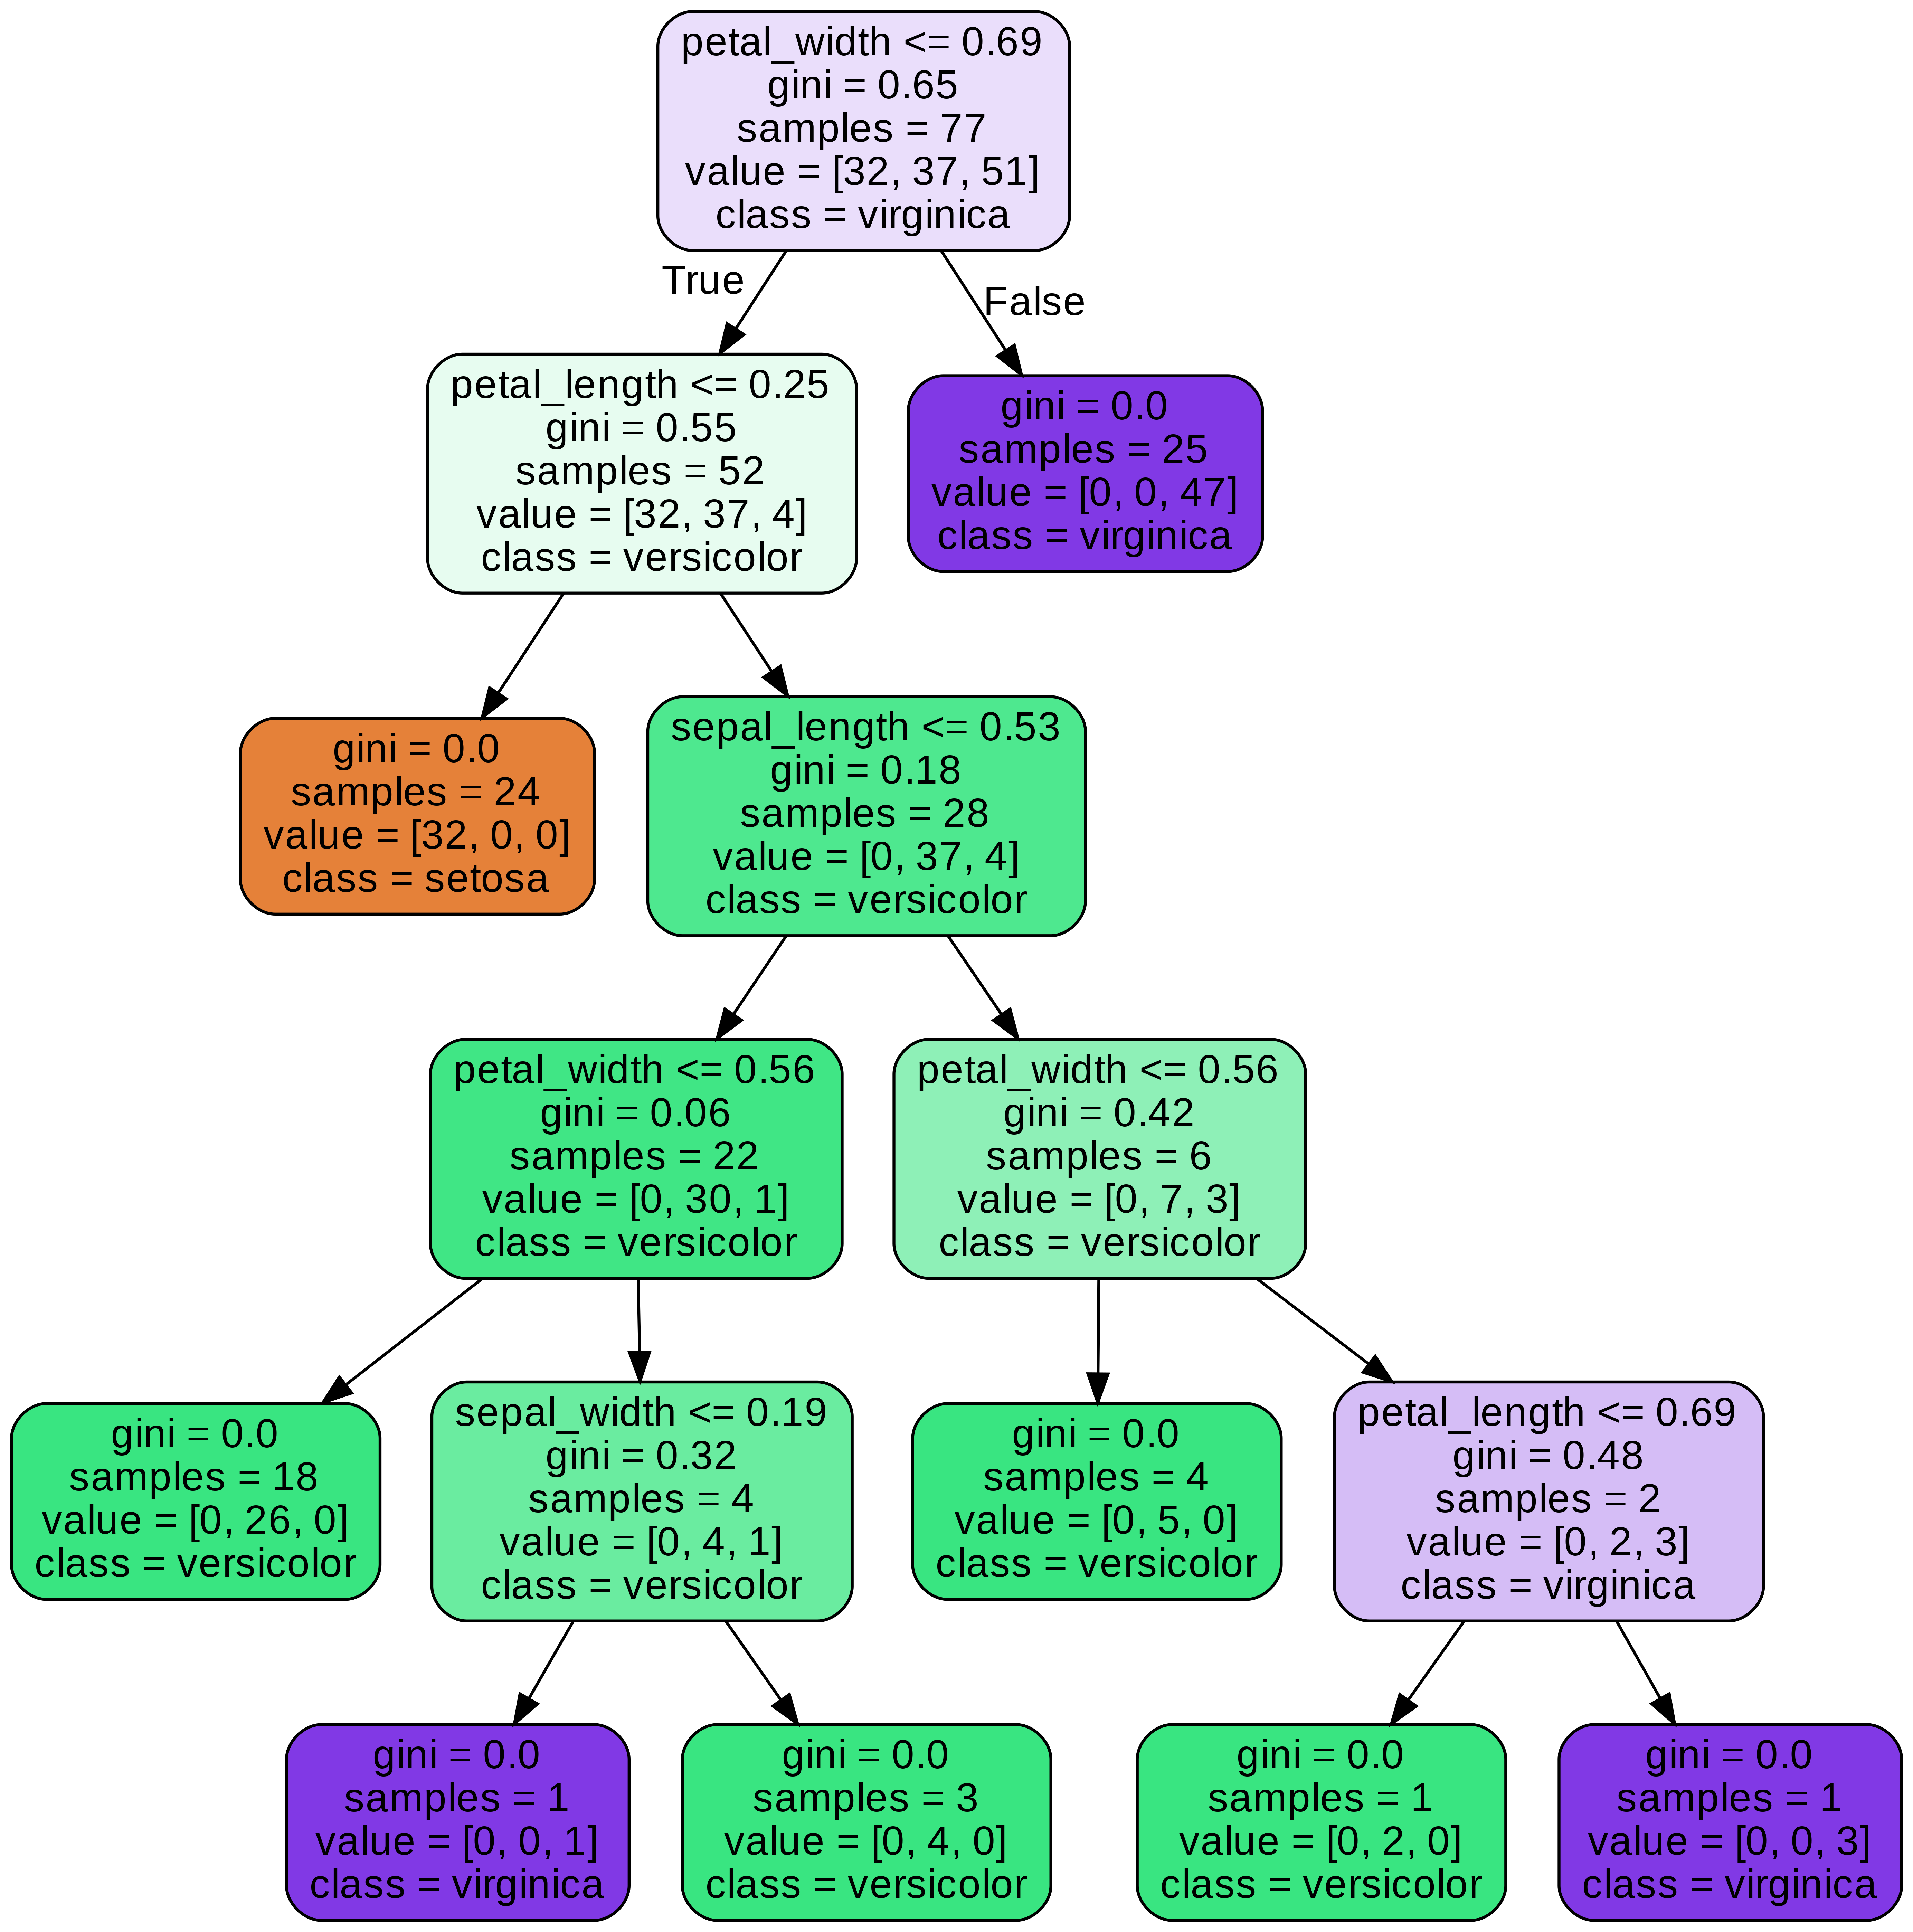

In [24]:
# Plotting the decision tree

estimator = model.estimators_[5]
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = labels,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

## HURRAH !!!

We've completed the project. 